In [1]:
import accretion as a
import accretion_objects as objects
from importlib import reload
reload(a)
reload(objects)

<module 'accretion_objects' from '/Users/joepalmo/Desktop/THESIS/errorprop/accretion_objects.py'>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st
import seaborn as sb
from astropy import constants as const
import random
import astropy.constants as const
import math
from tqdm import tqdm
import extinction as ex
import pdb
import glob
import scipy.optimize as optimization
from matplotlib.animation import FuncAnimation

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

In [3]:
observed = pd.read_csv('accdb_updated.csv')
observed['Upper Limit'] = observed['Upper Limit'].fillna('No')
nolimit = observed[observed['Upper Limit']=='No']

In [4]:
n = objects.AccretionDistribution(nolimit)
n.bootstrap()
#n.UVExcessErrorProp(0.5, 15, 0.3, 0.5, 3.5, 1.5, 0.3, 1000, RinUnc=2, variability=0.25, age_scatter=True)
#n.UVExcessErrorProp(0, 0, 0, 0, 3, 0, 0, 1, variability=0, age_scatter=False)
#df_test = n.create_df()

In [5]:
smaller_elements = [element for element in n.distances if element < 500]
len(smaller_elements)

252

In [6]:
pdffit = objects.AccretionDistribution(nolimit)
pdffit.mass_from_prior(300, np.array(n.masses))
pdffit.age_from_prior(300, np.array(n.ages))
pdffit.distance_from_prior(300, np.array(n.distances))
pdffit.Av_from_prior(300, np.array(n.Avs))

In [13]:
def input_histogram(accdist, title=''):
    #log bins calculation
    masses = [mass for mass in accdist.masses if mass > 0]
    logmassbins = objects.getLogBins((masses), 20)
    
    distances = [distance for distance in accdist.distances if distance > 0]
    logdistancebins = objects.getLogBins((distances), 20)
    
    fig, axs = plt.subplots(2,2, figsize=(15,12))
    fig.subplots_adjust(hspace=0.34)
    ax = plt.gca()
    #mass
    #axs[0,0].hist(masses, facecolor='lightsalmon', edgecolor='salmon', bins=logmassbins, alpha=0.4, label='PDF Fit')
    axs[0,0].hist(n.masses, facecolor='skyblue', edgecolor='cornflowerblue', bins=logmassbins, alpha=0.4)#, label='Bootstrapped')
    axs[0,0].set_xlabel('Mass (M$_\\odot)$', fontsize=20)
    axs[0,0].set_xlim(0.005, 7)
    axs[0,0].set_ylabel('Count', fontsize=20)
    axs[0,0].set_title('Mass (M$_\\odot)$', fontsize=40)
    axs[0,0].set_xscale('log')
    #axs[0,0].legend(fontsize=15)
    #age
    #agehist, agebins, _ = axs[0,1].hist(accdist.ages,  facecolor='lightsalmon', edgecolor='salmon', bins=20, alpha=0.4, label='PDF Fit')
    axs[0,1].hist(n.ages, facecolor='skyblue', edgecolor='cornflowerblue', bins=20, alpha=0.4, label='Bootstrapped')
    axs[0,1].set_xlabel('Age (Myr)', fontsize=20)
    axs[0,1].set_ylabel('Count', fontsize=20)
    axs[0,1].set_title('Age (Myr)', fontsize=40)
    #distance
    #disthist, distbins, _ = axs[1,0].hist(pdffit.distances, facecolor='skyblue', edgecolor='cornflowerblue', bins=20, alpha=0.4, label='PDF Fit')
    axs[1,0].hist(n.distances, facecolor='skyblue', edgecolor='cornflowerblue', bins=logdistancebins, alpha=0.4)
    #axs[1,0].hist(smaller_elements, facecolor='skyblue', edgecolor='cornflowerblue', bins=20, alpha=0.4)
    axs[1,0].set_xlabel('Distance (pc)', fontsize=20)
    axs[1,0].set_ylabel('Count', fontsize=20)
    axs[1,0].set_xscale('log')
    axs[1,0].set_title('Distance (pc)', fontsize=40)
    #Av
    #Avhist, Avbins, _ = axs[1,1].hist(accdist.Avs, facecolor='lightsalmon', edgecolor='salmon', bins=20, alpha=0.4)
    axs[1,1].hist(n.Avs, facecolor='skyblue', edgecolor='cornflowerblue', bins=20, alpha=0.4)
    axs[1,1].set_xlabel(r'A$_{v}$ (mag)', fontsize=20)
    axs[1,1].set_ylabel('Count', fontsize=20)
    axs[1,1].set_title(r'A$_{v}$ (mag)', fontsize=40)
    
    axs[0,0].tick_params(labelsize=13.5)
    axs[0,1].tick_params(labelsize=13.5)
    axs[1,0].tick_params(labelsize=13.5)
    axs[1,1].tick_params(labelsize=13.5)
    
    
    if title !='':
        fig.suptitle(title, fontsize=30, fontweight='bold')
    
    return fig

(array([41., 35., 32., 39., 32., 27., 28., 33., 14., 19.]),
 array([1.79239082e-03, 2.41137198e-01, 4.80482005e-01, 7.19826812e-01,
        9.59171619e-01, 1.19851643e+00, 1.43786123e+00, 1.67720604e+00,
        1.91655085e+00, 2.15589565e+00, 2.39524046e+00]),
 <BarContainer object of 10 artists>)

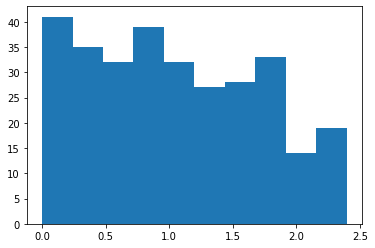

In [8]:
plt.hist(pdffit.masses)

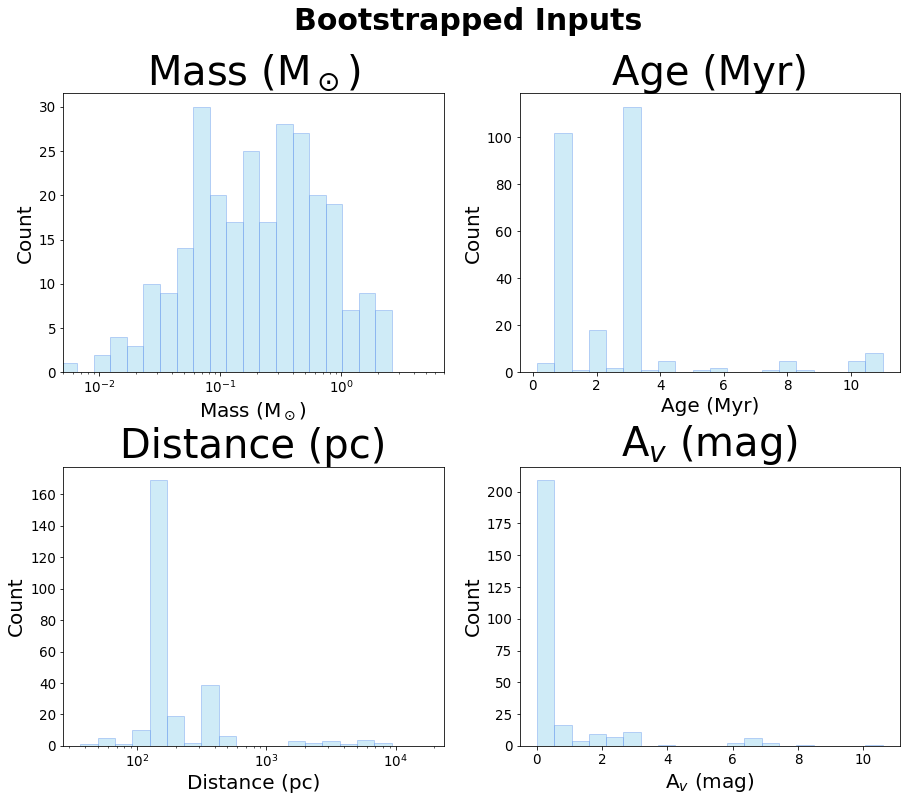

In [14]:
pdffit = input_histogram(n, title='Bootstrapped Inputs')
#pdffit.savefig('TalkFigs/inputs.png', dpi=120)

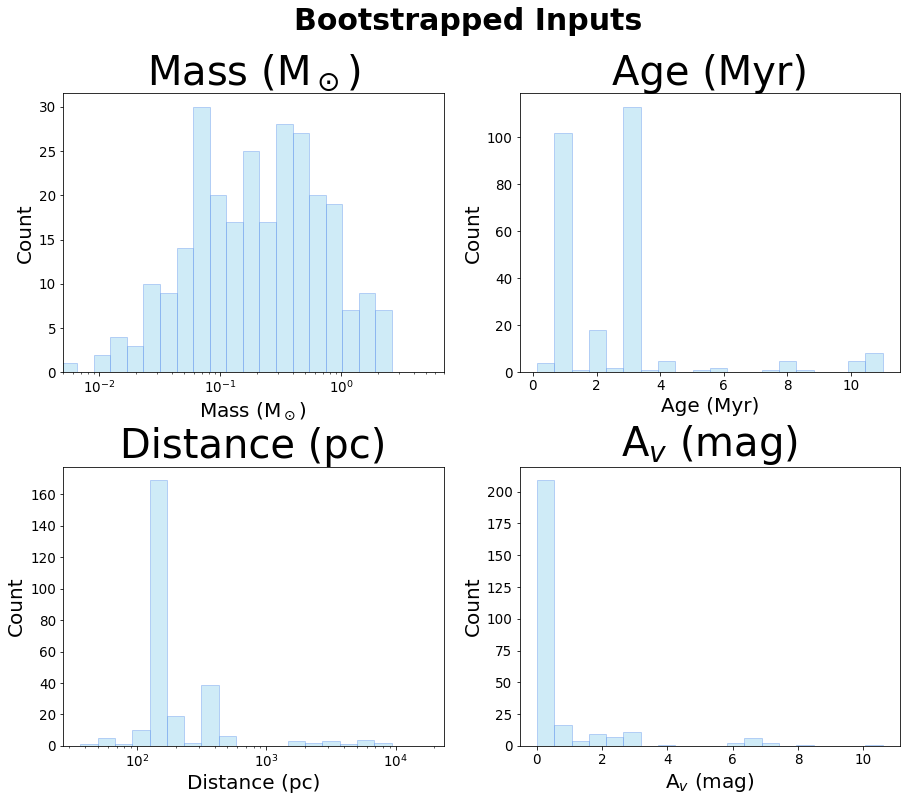

In [16]:
bootstrapped_fig = input_histogram(n, title='Bootstrapped Inputs')
bootstrapped_fig.savefig('bootstrapped_inputs.png', dpi=120)

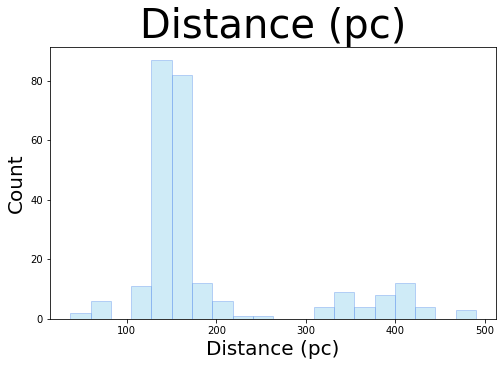

In [121]:
fig, ax = plt.subplots(figsize=(8,5))
ax.hist(smaller_elements, facecolor='skyblue', edgecolor='cornflowerblue', bins=20, alpha=0.4)
ax.set_xlabel('Distance (pc)', fontsize=20)
ax.set_ylabel('Count', fontsize=20)
ax.set_title('Distance (pc)', fontsize=40)
fig.savefig('bootstrapped_dist.png', dpi=500)

In [273]:
n.distance_from_gaussian(300, 140, 15)
n.age_from_gaussian(300, 1.5, 0.3)

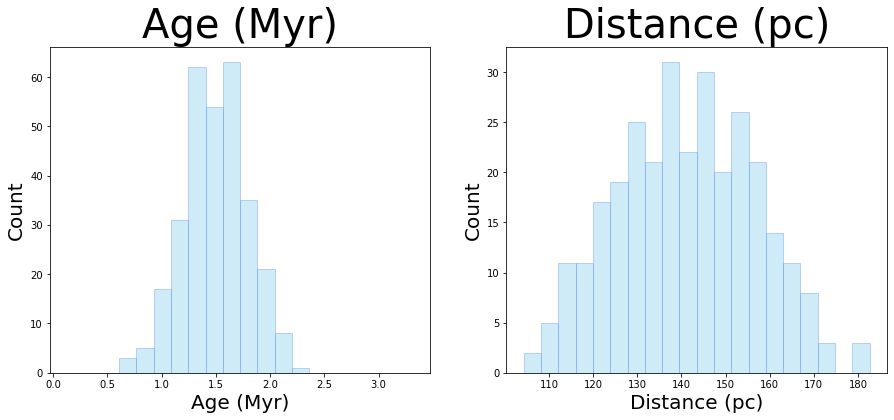

In [275]:
fig, axs = plt.subplots(1,2, figsize=(15,6))
fig.subplots_adjust(hspace=0.34)
ax = plt.gca()
#age
axs[0].hist(n.ages, facecolor='skyblue', edgecolor='cornflowerblue', bins=agebins, alpha=0.4, label='Bootstrapped')
axs[0].set_xlabel('Age (Myr)', fontsize=20)
axs[0].set_ylabel('Count', fontsize=20)
axs[0].set_title('Age (Myr)', fontsize=40)
#distance
axs[1].hist(n.distances, facecolor='skyblue', edgecolor='cornflowerblue', bins=distbins, alpha=0.4)
#axs[1,0].hist(smaller_elements, facecolor='skyblue', edgecolor='cornflowerblue', bins=20, alpha=0.4)
axs[1].set_xlabel('Distance (pc)', fontsize=20)
axs[1].set_ylabel('Count', fontsize=20)
axs[1].set_title('Distance (pc)', fontsize=40)

fig.savefig('taurus_input.png',dpi=500)

In [290]:
m = np.linspace(0,2, 10000)
romano = a.Romano2005(m, 700)

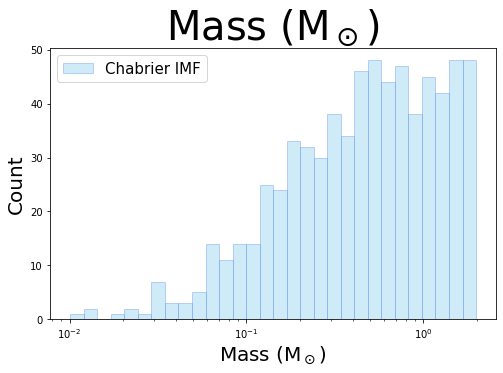

In [301]:
#mass
logmassbins = objects.getLogBins((romano), 30)
fig, ax1 = plt.subplots(figsize=(8,5))
#fig.suptitle('Chabrier Initial Mass Function')
ax1.hist(romano, facecolor='skyblue', edgecolor='cornflowerblue', bins=logmassbins, alpha=0.4, label='Chabrier IMF')
ax1.set_xlabel('Mass (M$_\\odot)$', fontsize=20)
ax1.set_ylabel('Count', fontsize=20)
ax1.set_title('Mass (M$_\\odot)$', fontsize=40)
ax1.set_xscale('log')
ax1.legend(fontsize=15)
fig.savefig('chabrier.png', dpi=500)

In [40]:
n = objects.AccretionDistribution(nolimit)
n.bootstrap()
n.UVExcessErrorProp(0.5, 15, 0.3, 0.5, 3.5, 1.5, 0.3, 1, RinUnc=2, variability=0.0, age_scatter=False)

In [ ]:
def derived_histogram(accdist, title=''):
    #log bins calculation
    masses = [mass for mass in accdist.masses if mass > 0]
    logmassbins = objects.getLogBins((masses), 30)
    
    fig, axs = plt.subplots(2,2, figsize=(15,12))
    fig.subplots_adjust(hspace=0.34)
    ax = plt.gca()
    #mass
    #axs[0,0].hist(masses, facecolor='lightsalmon', edgecolor='salmon', bins=logmassbins, alpha=0.4, label='PDF Fit')
    axs[0,0].hist(n.masses, facecolor='skyblue', edgecolor='cornflowerblue', bins=logmassbins, alpha=0.4)#, label='Bootstrapped')
    axs[0,0].set_xlabel('Mass (M$_\\odot)$', fontsize=20)
    axs[0,0].set_xlim(0.005, 7)
    axs[0,0].set_ylabel('Count', fontsize=20)
    axs[0,0].set_title('Mass (M$_\\odot)$', fontsize=40)
    axs[0,0].set_xscale('log')
    #axs[0,0].legend(fontsize=15)
    #age
    #agehist, agebins, _ = axs[0,1].hist(accdist.ages,  facecolor='lightsalmon', edgecolor='salmon', bins=20, alpha=0.4, label='PDF Fit')
    axs[0,1].hist(n.ages, facecolor='skyblue', edgecolor='cornflowerblue', bins=20, alpha=0.4, label='Bootstrapped')
    axs[0,1].set_xlabel('Age (Myr)', fontsize=20)
    axs[0,1].set_ylabel('Count', fontsize=20)
    axs[0,1].set_title('Age (Myr)', fontsize=40)
    #distance
    disthist, distbins, _ = axs[1,0].hist(pdffit.distances, facecolor='skyblue', edgecolor='cornflowerblue', bins=20, alpha=0.4, label='PDF Fit')
    #axs[1,0].hist(n.distances, facecolor='skyblue', edgecolor='cornflowerblue', bins=20, alpha=0.4)
    #axs[1,0].hist(smaller_elements, facecolor='skyblue', edgecolor='cornflowerblue', bins=20, alpha=0.4)
    axs[1,0].set_xlabel('Distance (pc)', fontsize=20)
    axs[1,0].set_ylabel('Count', fontsize=20)
    axs[1,0].set_title('Distance (pc)', fontsize=40)
    #Av
    #Avhist, Avbins, _ = axs[1,1].hist(accdist.Avs, facecolor='lightsalmon', edgecolor='salmon', bins=20, alpha=0.4)
    axs[1,1].hist(n.Avs, facecolor='skyblue', edgecolor='cornflowerblue', bins=20, alpha=0.4)
    axs[1,1].set_xlabel(r'A$_{v}$ (mag)', fontsize=20)
    axs[1,1].set_ylabel('Count', fontsize=20)
    axs[1,1].set_title(r'A$_{v}$ (mag)', fontsize=40)
    
    axs[0,0].tick_params(labelsize=13.5)
    axs[0,1].tick_params(labelsize=13.5)
    axs[1,0].tick_params(labelsize=13.5)
    axs[1,1].tick_params(labelsize=13.5)
    
    
    if title !='':
        fig.suptitle(title, fontsize=30, fontweight='bold')
    
    return fig

In [41]:
#disk fragmentation plot

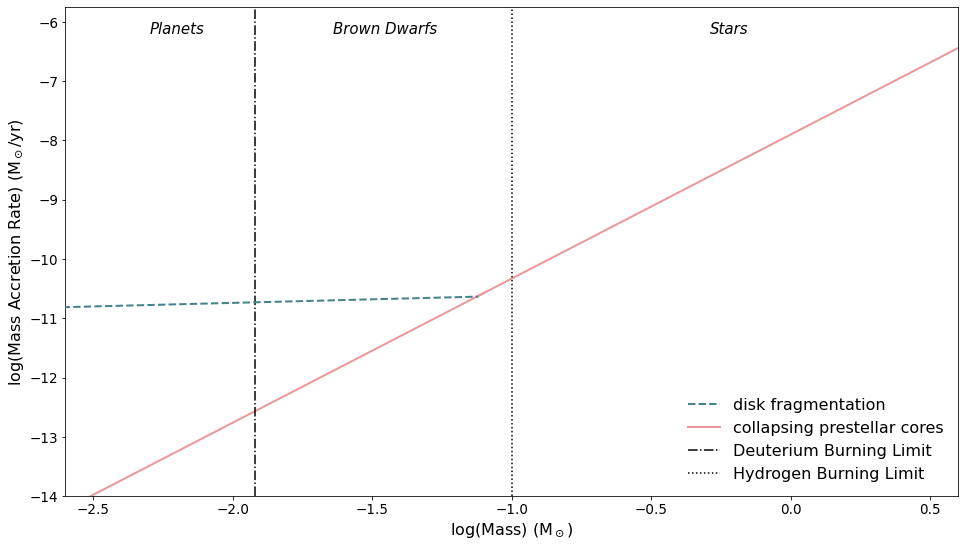

In [55]:
fig = plt.figure(figsize=(16,9))
ax = plt.gca()

x = np.linspace(-5.5,-1.12,10)
y=-10.5+0.12*x
#y = m*x+c
line1, = ax.plot(x,y,color='#45818e',ls='--', label="disk fragmentation", zorder=4, linewidth=2)
x = np.arange(np.log10(0.075),1,0.1)
y2=2.43*x-7.9
line2, = ax.plot(x,y2,color='#ea9999', label="collapsing prestellar cores", zorder=-2, linewidth=2)
x = np.arange(-5.5,np.log10(0.075)+0.1,0.1)
y2=2.43*x-7.9
line2, = ax.plot(x,y2,color='#ea9999', alpha=1, zorder=-3, linewidth=2)

ax.axvline(x=np.log10(0.012), color='black', linestyle='-.', label='Deuterium Burning Limit')
ax.axvline(x=np.log10(0.1), color='black', linestyle=':', label='Hydrogen Burning Limit')
ax.set_xlim(-2.6, 0.6)
ax.set_ylim(-14, -5.75)
ax.set_xlabel('log(Mass) (M$_\odot$)', size=16)
ax.set_ylabel('log(Mass Accretion Rate) (M$_\odot$/yr)', size=16)
ax.text(-2.3, -6.2, 'Planets', size = 15, fontstyle='italic')
ax.text(-1.64, -6.2, 'Brown Dwarfs', size = 15, fontstyle='italic')
ax.text(-0.29, -6.2, 'Stars', size = 15, fontstyle='italic')
ax.tick_params(labelsize=13.5)
ax.legend(loc='lower right', prop={'family':'sans-serif', 'style':'normal', 'size': 16}, frameon=False, shadow=True)
fig.savefig('TalkFigs/clearmoneyplot.png', dpi=120)

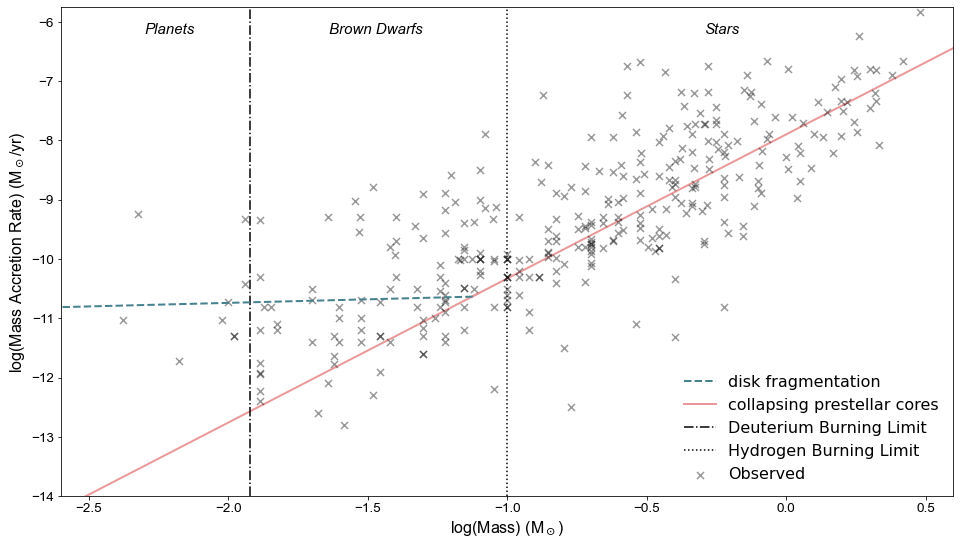

In [209]:
fig = plt.figure(figsize=(16,9))
ax = plt.gca()

observed_mass = np.log10(nolimit['Object Mass M_Solar'])
observed_mdot = np.log10(nolimit['Accretion Rate M_solar yr-1'])

x = np.linspace(-5.5,-1.12,10)
y=-10.5+0.12*x
#y = m*x+c
line1, = ax.plot(x,y,color='#45818e',ls='--', label="disk fragmentation", zorder=4, linewidth=2)
x = np.arange(np.log10(0.075),1,0.1)
y2=2.43*x-7.9
line2, = ax.plot(x,y2,color='#ea9999', label="collapsing prestellar cores", zorder=-2, linewidth=2)
x = np.arange(-5.5,np.log10(0.075)+0.1,0.1)
y2=2.43*x-7.9
line2, = ax.plot(x,y2,color='#ea9999', alpha=1, zorder=-3, linewidth=2)

ax.scatter(observed_mass, observed_mdot, edgecolor='black', facecolor='black', s = 50, marker='x', alpha=0.4, label='Observed')
ax.axvline(x=np.log10(0.012), color='black', linestyle='-.', label='Deuterium Burning Limit')
ax.axvline(x=np.log10(0.1), color='black', linestyle=':', label='Hydrogen Burning Limit')
ax.set_xlim(-2.6, 0.6)
ax.set_ylim(-14, -5.75)
ax.set_xlabel('log(Mass) (M$_\odot$)', size=16)
ax.set_ylabel('log(Mass Accretion Rate) (M$_\odot$/yr)', size=16)
ax.text(-2.3, -6.2, 'Planets', size = 15, fontstyle='italic')
ax.text(-1.64, -6.2, 'Brown Dwarfs', size = 15, fontstyle='italic')
ax.text(-0.29, -6.2, 'Stars', size = 15, fontstyle='italic')
ax.tick_params(labelsize=13.5)
ax.legend(loc='lower right', prop={'family':'sans-serif', 'style':'normal', 'size': 16}, frameon=False, shadow=True)
fig.savefig('TalkFigs/observedmoneyplot.png', dpi=120)

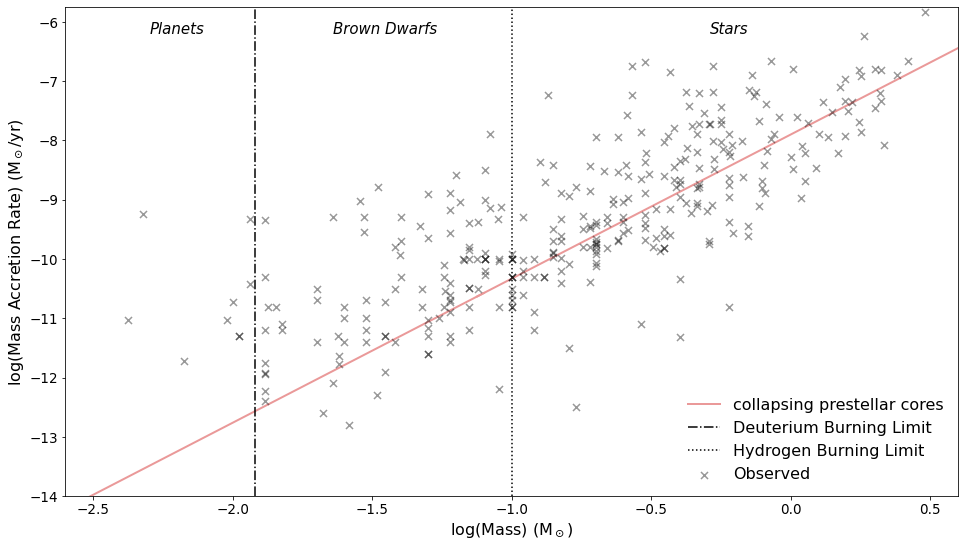

In [57]:
fig = plt.figure(figsize=(16,9))
ax = plt.gca()

observed_mass = np.log10(nolimit['Object Mass M_Solar'])
observed_mdot = np.log10(nolimit['Accretion Rate M_solar yr-1'])

x = np.linspace(-5.5,-1.12,10)
y=-10.5+0.12*x
#y = m*x+c
#line1, = ax.plot(x,y,color='#45818e',ls='--', label="disk fragmentation", zorder=4, linewidth=2)
x = np.arange(np.log10(0.075),1,0.1)
y2=2.43*x-7.9
line2, = ax.plot(x,y2,color='#ea9999', label="collapsing prestellar cores", zorder=-2, linewidth=2)
x = np.arange(-5.5,np.log10(0.075)+0.1,0.1)
y2=2.43*x-7.9
line2, = ax.plot(x,y2,color='#ea9999', alpha=1, zorder=-3, linewidth=2)

ax.scatter(observed_mass, observed_mdot, edgecolor='black', facecolor='black', s = 50, marker='x', alpha=0.4, label='Observed')
ax.axvline(x=np.log10(0.012), color='black', linestyle='-.', label='Deuterium Burning Limit')
ax.axvline(x=np.log10(0.1), color='black', linestyle=':', label='Hydrogen Burning Limit')
ax.set_xlim(-2.6, 0.6)
ax.set_ylim(-14, -5.75)
ax.set_xlabel('log(Mass) (M$_\odot$)', size=16)
ax.set_ylabel('log(Mass Accretion Rate) (M$_\odot$/yr)', size=16)
ax.text(-2.3, -6.2, 'Planets', size = 15, fontstyle='italic')
ax.text(-1.64, -6.2, 'Brown Dwarfs', size = 15, fontstyle='italic')
ax.text(-0.29, -6.2, 'Stars', size = 15, fontstyle='italic')
ax.tick_params(labelsize=13.5)
ax.legend(loc='lower right', prop={'family':'sans-serif', 'style':'normal', 'size': 16}, frameon=False, shadow=True)
fig.savefig('TalkFigs/truemdotmoneyplot.png', dpi=120)

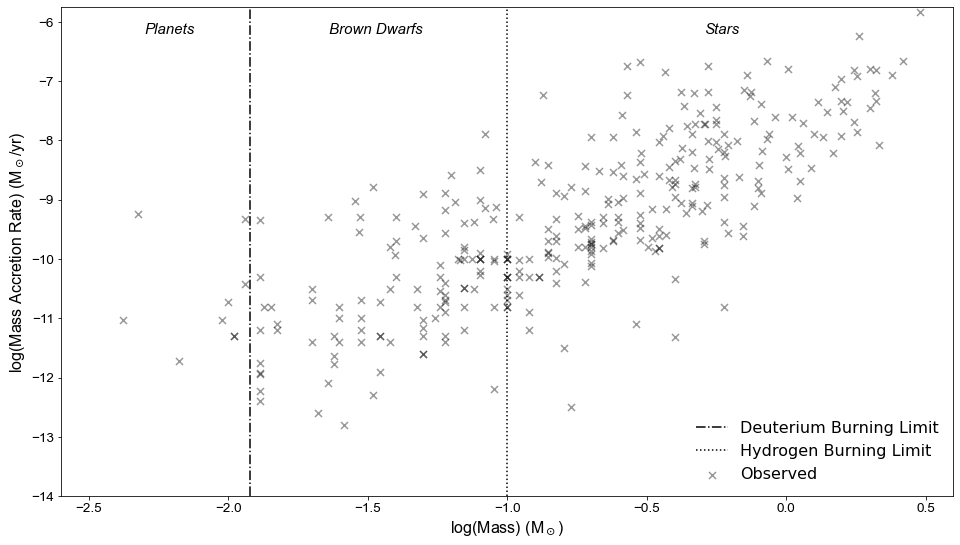

In [208]:
fig = plt.figure(figsize=(16,9))
ax = plt.gca()

observed_mass = np.log10(nolimit['Object Mass M_Solar'])
observed_mdot = np.log10(nolimit['Accretion Rate M_solar yr-1'])

x = np.linspace(-5.5,-1.12,10)
y=-10.5+0.12*x
#y = m*x+c
#line1, = ax.plot(x,y,color='#45818e',ls='--', label="disk fragmentation", zorder=4, linewidth=2)
x = np.arange(np.log10(0.075),1,0.1)
y2=2.43*x-7.9
#line2, = ax.plot(x,y2,color='#ea9999', label="collapsing prestellar cores", zorder=-2, linewidth=2)
x = np.arange(-5.5,np.log10(0.075)+0.1,0.1)
y2=2.43*x-7.9
#line2, = ax.plot(x,y2,color='#ea9999', alpha=1, zorder=-3, linewidth=2)

ax.scatter(observed_mass, observed_mdot, edgecolor='black', facecolor='black', s = 50, marker='x', alpha=0.4, label='Observed')
ax.axvline(x=np.log10(0.012), color='black', linestyle='-.', label='Deuterium Burning Limit')
ax.axvline(x=np.log10(0.1), color='black', linestyle=':', label='Hydrogen Burning Limit')
ax.set_xlim(-2.6, 0.6)
ax.set_ylim(-14, -5.75)
ax.set_xlabel('log(Mass) (M$_\odot$)', size=16)
ax.set_ylabel('log(Mass Accretion Rate) (M$_\odot$/yr)', size=16)
ax.text(-2.3, -6.2, 'Planets', size = 15, fontstyle='italic')
ax.text(-1.64, -6.2, 'Brown Dwarfs', size = 15, fontstyle='italic')
ax.text(-0.29, -6.2, 'Stars', size = 15, fontstyle='italic')
ax.tick_params(labelsize=13.5)
ax.legend(loc='lower right', prop={'family':'sans-serif', 'style':'normal', 'size': 16}, frameon=False, shadow=True)
fig.savefig('TalkFigs/observedmdotmoneyplot.png', dpi=120)

### Marginal Distribution Plot

In [19]:
n = objects.AccretionDistribution(nolimit)
n.bootstrap()
n.UVExcessErrorProp(0.5, 15, 0.3, 0.5, 3.5, 2, 0.4, 1, RinUnc=2, variability=0.25, age_scatter=True)
#n.UVExcessErrorProp(0, 0, 0, 0, 3, 0, 0, 1, variability=0, age_scatter=False)

In [20]:
df_test = n.create_df()

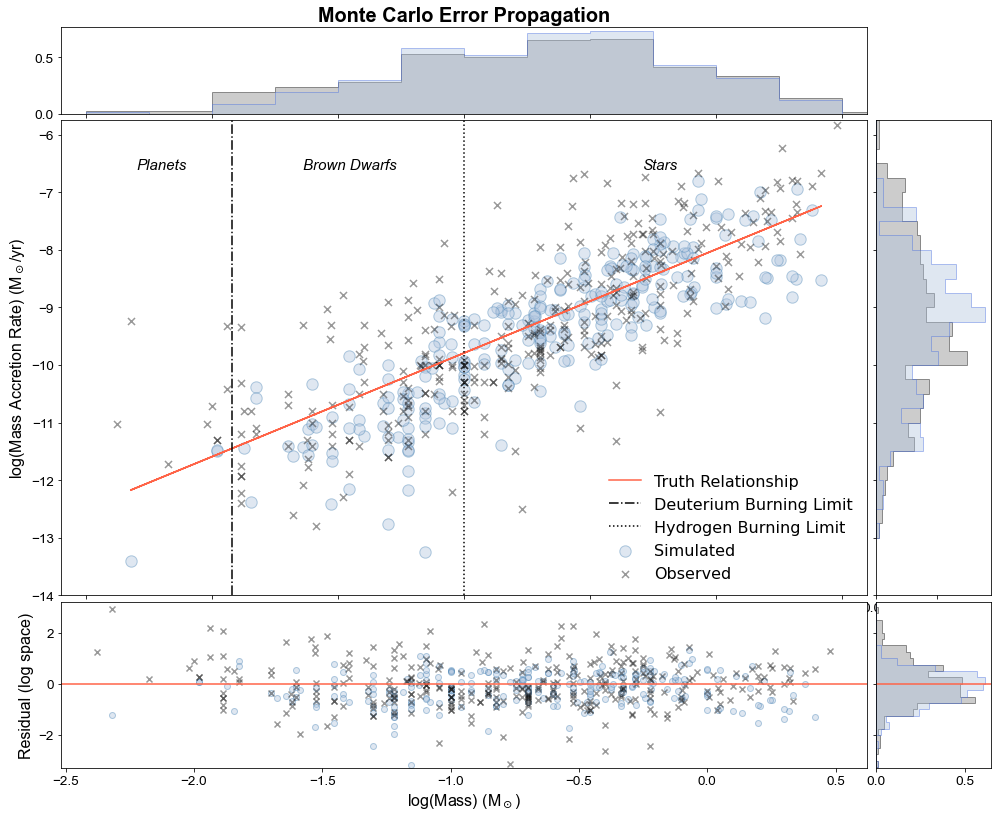

In [227]:
margdist = objects.MarginalDistribution(nolimit, df_test)
margdist.savefig('margdist.png', dpi=500)

### Residual Plot

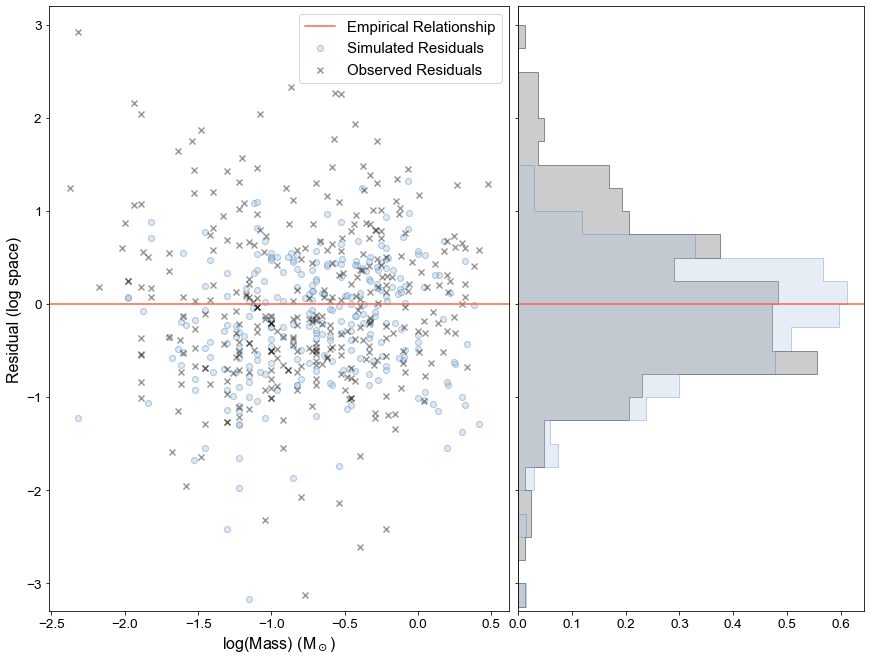

In [228]:
resid = objects.residuals(nolimit, df_test)
resid.savefig('resid.png', dpi=500)

### Uncertainty Table

In [24]:
n.linefluxErrorProp(0.5, 15, 0.3, 0.5, 0.4, 1, RinUnc=2, line='Ha', variability=0.0, age_scatter=False)

In [32]:
df_test = n.create_df()

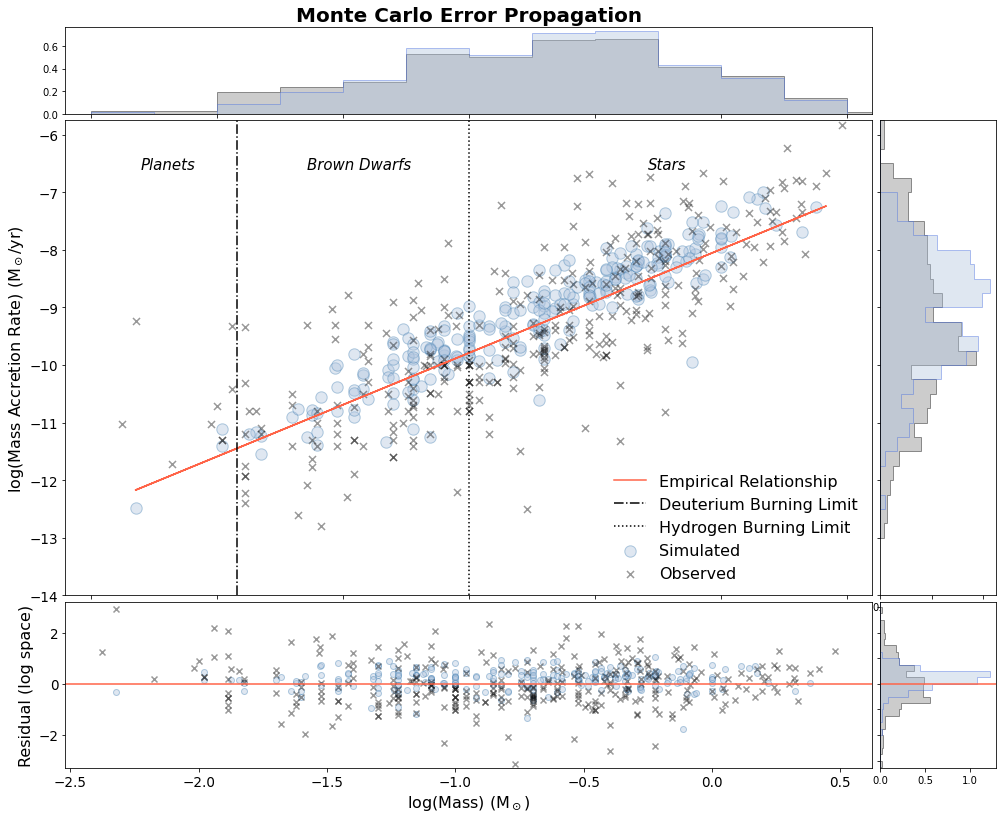

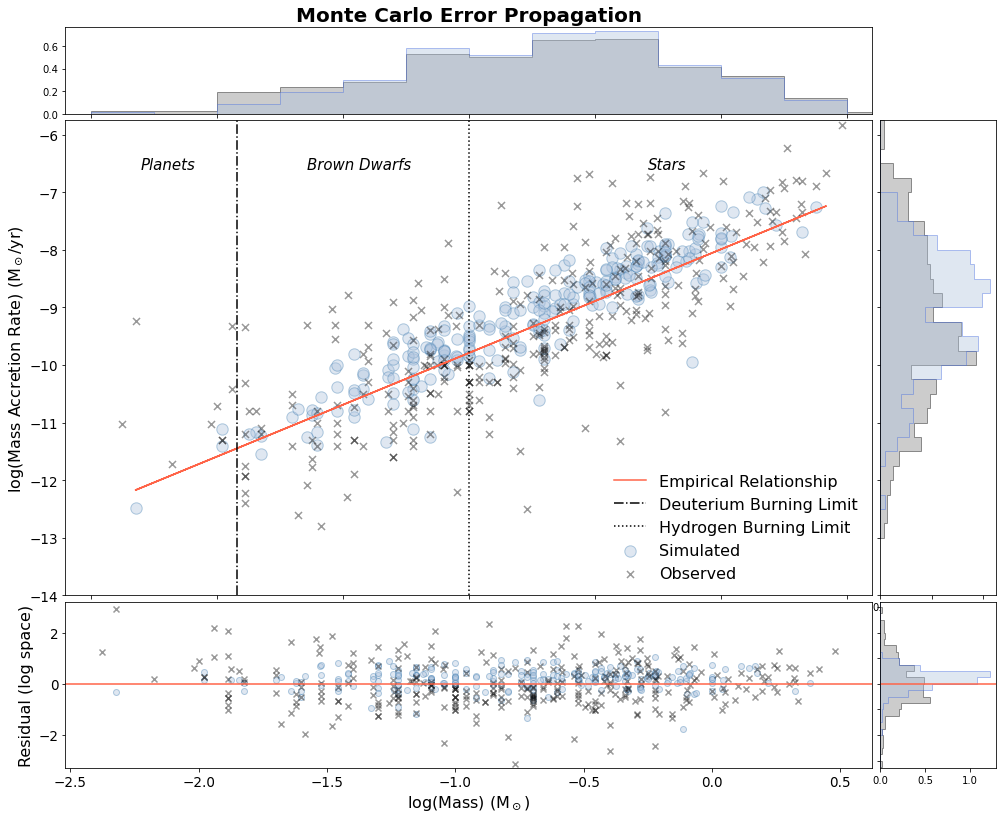

In [33]:
objects.MarginalDistribution(nolimit, df_test)

In [21]:
n.errorinfo

,Variable,Uncertainty,Units,Dependent Variables
0,Spectral Type,0.5,subclasses,"M$_{\star}$, R$_{\star}$, R$_{in}$"
1,Distance,15,pc,L$_{acc}$
2,Age,0.3,Myr,"M$_{\star}$, R$_{\star}$, R$_{in}$"
3,Extinction,0.5,mag,L$_{acc}$
4,Bolometric Correction,3.5 $ \pm $ 2,flux scale factor,L$_{acc}$
5,UV Excess Flux,40,% error,L$_{acc}$
6,$R_{in}$,5 $ \pm $2,$R_{\star}$,R$_{in}$
7,Variability,0.25,dex,N/A
8,Age Scatter,True,,N/A


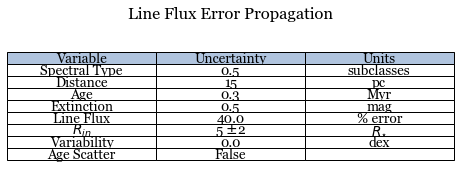

In [25]:
font = {'family' : 'Georgia',
            'weight' : 'normal',
            'size'   : 13.7}

plt.rc('font', **font)

fig = plt.figure(figsize = (8, 3))
ax = fig.add_subplot()

ax.table(cellText = n.errorinfo.values,
          rowLabels = None,
          colColours =["lightsteelblue"] * len(n.errorinfo.columns), 
          colLabels = n.errorinfo.columns,
          loc = "center",
          cellLoc = "center"
         )
ax.set_title(n.title)
ax.axis('off')

fig.savefig('LineFluxunctable.png', dpi=120)

IndexError: list index out of range

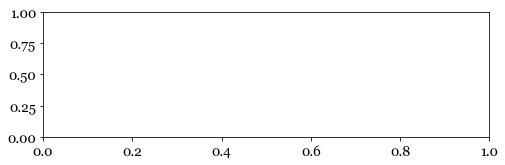

In [81]:
unctable = n.unctable()
unctable.savefig('UncTable.png', dpi=500)

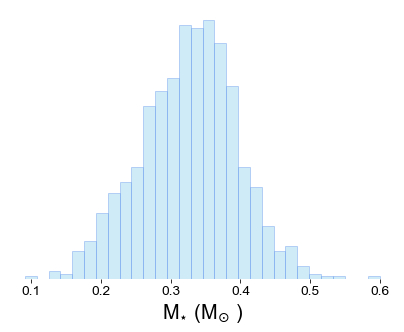

In [201]:
fig = plt.figure(figsize=(7,5))
frame1 = fig.add_subplot(111)
frame1.hist(n.accretion_distribution[31].massUncDist, facecolor='skyblue', edgecolor='cornflowerblue', bins=30, alpha=0.4)
frame1.set_xlabel(r'M$_{\star}$ (M$_{\odot}$ )', size=20)
frame1.set_frame_on(False)
frame1.set_facecolor('#ffffff')
#plt.axis('off')
frame1.axes.get_yaxis().set_visible(False)
fig.savefig('TalkFigs/masshist.png', dpi=120)

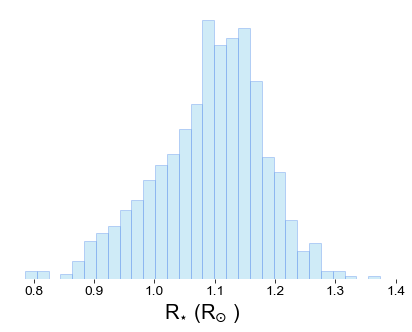

In [202]:
fig = plt.figure(figsize=(7,5))
frame1 = plt.gca()
frame1.hist(n.accretion_distribution[31].radiusUncDist, facecolor='skyblue', edgecolor='cornflowerblue', bins=30, alpha=0.4)
frame1.set_xlabel(r'R$_{\star}$ (R$_{\odot}$ )', size=20)
frame1.set_frame_on(False)
frame1.set_facecolor('white')
#plt.axis('off')
frame1.axes.get_yaxis().set_visible(False)
fig.savefig('TalkFigs/radiushist.png', dpi=120)
plt.show()

In [203]:
Lacc = [mass for mass in n.accretion_distribution[31].Lacc if mass > 0]
logLaccbins = objects.getLogBins(Lacc, 30)

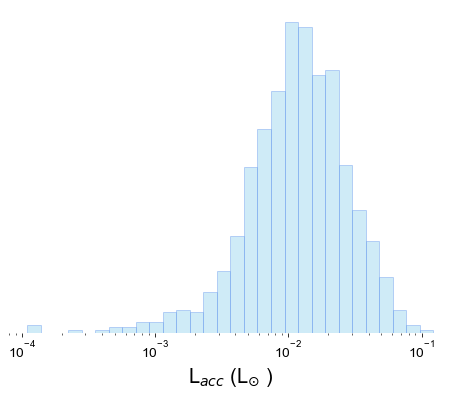

In [206]:

fig = plt.figure(figsize=(8,6))
frame1 = plt.gca()
frame1.hist(n.accretion_distribution[31].Lacc, facecolor='skyblue', edgecolor='cornflowerblue', bins=logLaccbins, alpha=0.4)
frame1.set_xlabel(r'L$_{acc}$ (L$_{\odot}$ )', size=20)
frame1.set_frame_on(False)
frame1.set_facecolor('white')
frame1.set_xscale('log')
#plt.axis('off')
frame1.axes.get_yaxis().set_visible(False)
fig.savefig('TalkFigs/Lacchist.png', dpi=120)
plt.show()

In [211]:
Mdot = [mass for mass in n.accretion_distribution[31].mdot if mass > 0]
logMdotbins = objects.getLogBins(Mdot, 30)

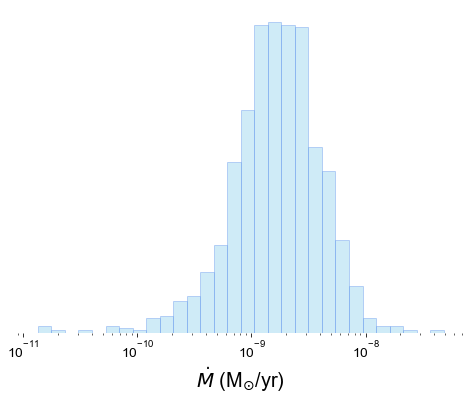

In [216]:
fig = plt.figure(figsize=(8,6))
frame1 = plt.gca()
frame1.hist(n.accretion_distribution[31].mdot, facecolor='skyblue', edgecolor='cornflowerblue', bins=logMdotbins, alpha=0.4)
frame1.set_xlabel(r'$\dot{M}$ (M$_{\odot}$/yr)', size=20)
frame1.set_frame_on(False)
frame1.set_facecolor('white')
frame1.set_xscale('log')
#plt.axis('off')
frame1.axes.get_yaxis().set_visible(False)
fig.savefig('TalkFigs/Mdothist.png', dpi=120)
plt.show()

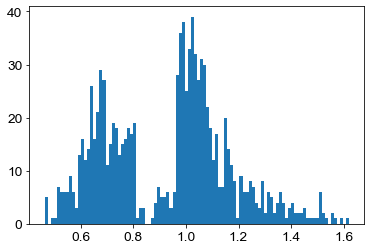

In [129]:
plt.hist(n.accretion_distribution[23].radiusUncDist, bins=100)
plt.show()

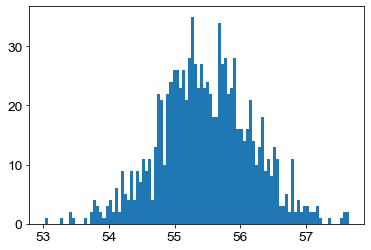

In [130]:
plt.hist(n.accretion_distribution[23].SpTyUncDist, bins=100)
plt.show()

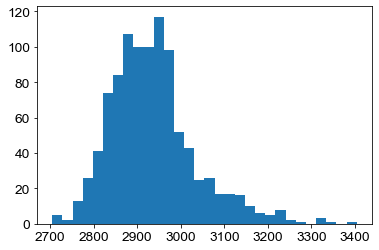

In [132]:
plt.hist(n.accretion_distribution[23].TeffUncDist, bins=30)
plt.show()

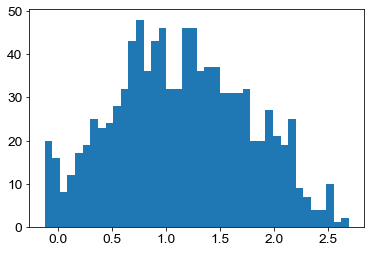

In [121]:
plt.hist(n.accretion_distribution[23].AvUncDist, bins=40)
plt.show()

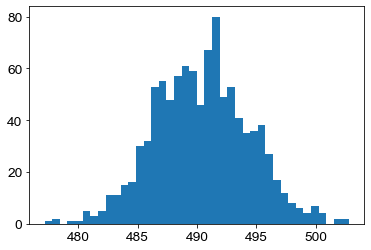

In [127]:
plt.hist(n.accretion_distribution[23].distUncDist, bins=40)
plt.show()